In [2]:
import pandas as pd
import sklearn as sklearn

In [ ]:
 !pip install keras

In [3]:
import os

df=pd.read_excel(
     os.path.join("/content/drive/MyDrive/Colab Notebooks/data", "reclamos_20201221_con_clas.xlsx"),
     engine='openpyxl',
)

In [4]:
df.columns

Index(['CASO_ID', 'MERCADO_ANALISTA', 'DESCRIPCION_CIUDADANO',
       'PETICION_CIUDADANO'],
      dtype='object')

In [5]:
df['MERCADO_ANALISTA']=df['MERCADO_ANALISTA'].astype('category')

In [6]:
df=df[['MERCADO_ANALISTA','PETICION_CIUDADANO','DESCRIPCION_CIUDADANO']].dropna()

In [7]:
df['data'] = df['DESCRIPCION_CIUDADANO'] + df['PETICION_CIUDADANO']

In [8]:
df_data=df[['MERCADO_ANALISTA', 'data']]

In [9]:
print(df_data.head())

         MERCADO_ANALISTA                                               data
0  APIA -Reclamo Seguros   RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...
1  APIA -Reclamo Seguros   Mi nombre es XX y el día 27 de Enero de este a...
2  APIA -Reclamo Seguros   Estimados Señores SVS\n\nCon fecha 13 de Octub...
3  APIA -Reclamo Seguros   En primera instancia solicité renvar mi tarjet...
4         Reclamo Valores  reclamo en contra Scotiabank por cobros de man...


In [10]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2MB 3.8MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172935 sha256=e62c229ee9047d53f364b497c8e286926a29f67a1622e48f5460bef6150adae7
  Stored in directory: /tmp/pip-ephem-wheel-cache-w7qw1w9m/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [11]:
import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords

stop_words=stopwords.words('spanish')
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stop_words]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
df_data['transcript'] = df_data['data'].apply(preprocess)
print(df_data['transcript'])

0      RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...
1      Mi nombrar ser XX día Enero año entregar carta...
2      Estimados Señores SVS Con fecho Octubre decir ...
3      En primero instancia solicitar renvar tarjeta ...
4      reclamar Scotiabank cobro mantención producto ...
                             ...                        
994    Estimados favor revisar procesar fusión ITAU C...
995    Con fecho febrero ser protestar cheque rescata...
996    Mal calcular valor póliza ahorrar error tipo c...
997    Estimados SVS Con fecho haber anular orden ven...
998    Tengo traspasar do mil quinientas accionar Com...
Name: transcript, Length: 999, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [36]:
print(df_data[['transcript', 'data']])

                                            transcript                                               data
0    RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...  RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...
1    Mi nombrar ser XX día Enero año entregar carta...  Mi nombre es XX y el día 27 de Enero de este a...
2    Estimados Señores SVS Con fecho Octubre decir ...  Estimados Señores SVS\n\nCon fecha 13 de Octub...
3    En primero instancia solicitar renvar tarjeta ...  En primera instancia solicité renvar mi tarjet...
4    reclamar Scotiabank cobro mantención producto ...  reclamo en contra Scotiabank por cobros de man...
..                                                 ...                                                ...
994  Estimados favor revisar procesar fusión ITAU C...  Estimados por favor revisar el proceso de fusi...
995  Con fecho febrero ser protestar cheque rescata...  Con fecha de febrero del 2013 me fueron protes...
996  Mal calcular valor póliza ahorrar error t

In [14]:
X = df_data['transcript']
y = (df['MERCADO_ANALISTA']=='Reclamo Valores').astype(int)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(669,) (330,) (669,) (330,)


GRAFICO PARA VER ACC Y LOSS

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

TOKENIZAMOS EL TEXTO

In [17]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_trainT = tokenizer.texts_to_sequences(X_train)
X_testT = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



In [18]:
for word in ['el', 'todos', 'seguro']:
...     print('{}: {}'.format(word, tokenizer.word_index[word]))

el: 8
todos: 603
seguro: 2


In [19]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_trainT, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_testT, padding='post', maxlen=maxlen)

print(X_train[0, :])

[   4   12 1365  450  162  469  470  360  320  451   78  540    4  883
  169 1366  375    2   89    4  116   55    9    2   89  131   12  139
   67    5   15  182  264   87  249   41  345  540   12  174  404  171
   18    1 1160  614 1010 3757  540    2   22    3    5  182    3  249
  120   55    9   36   89    9  503  193    2   25   28  152  540   69
  116   55    3   39   81  377  300    3    5  378   47  120  123  255
    2   89    9  169  540  255  375   21 2250    2   89  131 1366  375
   16    2]


In [20]:
y_train

34     0
345    0
975    1
736    1
54     0
      ..
686    0
566    1
760    1
498    0
937    0
Name: MERCADO_ANALISTA, Length: 669, dtype: int64

MODELAMOS CON EMBEDDING LAYER

In [21]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           369050    
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 419,071
Trainable params: 419,071
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9333


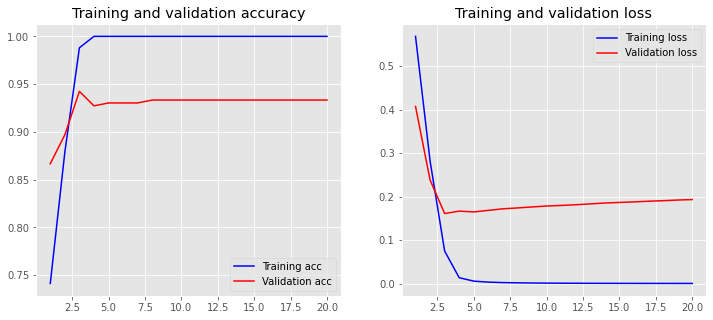

In [22]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

MODELAMOS CON EMBEDDING LAYER CON GLOBALMAXPOOL

In [23]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           369050    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 369,571
Trainable params: 369,571
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9273


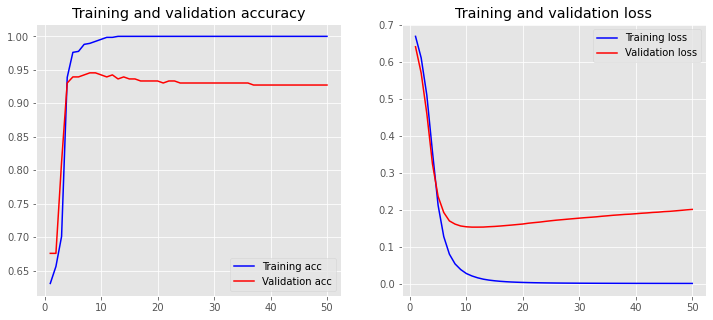

In [24]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Convolutional Neural Networks (CNN)

In [25]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          738100    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 803,529
Trainable params: 803,529
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9485


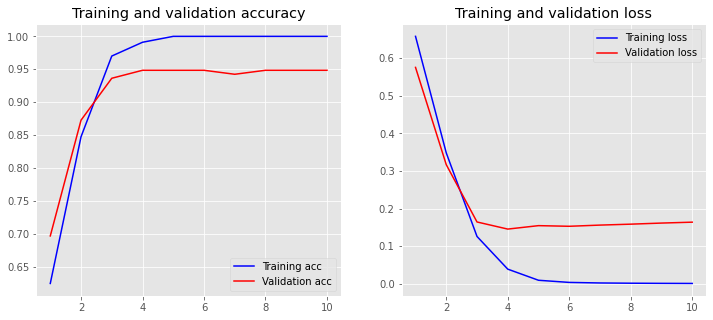

In [26]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Usando EMBEDDING de palabras pre-entrenadas

In [27]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = '/content/drive/MyDrive/Colab Notebooks/data/glove-sbwc.i25.vec'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

KeyboardInterrupt: ignored

In [ ]:
wordvectors.most_similar_cosmul(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.9141066670417786),
 ('isabel', 0.8743277192115784),
 ('princesa', 0.843113124370575),
 ('infanta', 0.8425983190536499),
 ('monarca', 0.8357319831848145),
 ('hija', 0.8211697936058044),
 ('consorte', 0.8179485201835632),
 ('iv', 0.813984215259552),
 ('esposa', 0.8115167617797852),
 ('ii', 0.8099035024642944)]

In [28]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [29]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
        '/content/drive/MyDrive/Colab Notebooks/data/glove-sbwc.i25.vec',
        tokenizer.word_index, embedding_dim)

In [30]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.8963555073838233

In [31]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           369050    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 369,571
Trainable params: 521
Non-trainable params: 369,050
_________________________________________________________________


Training Accuracy: 0.8371
Testing Accuracy:  0.8121


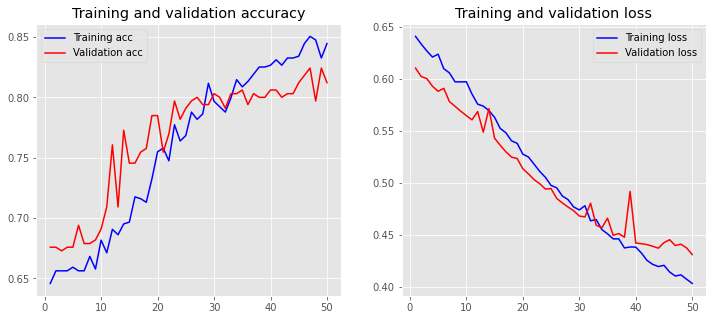

In [32]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [33]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           369050    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 369,571
Trainable params: 369,571
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9273


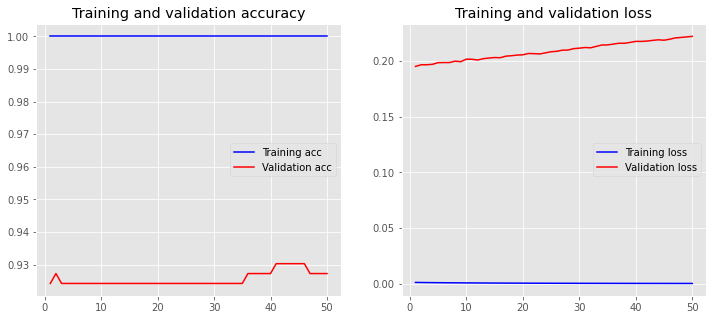

In [35]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [38]:
def create_model1(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [39]:
def create_model2(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()


    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))



    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

X = df_data['transcript']
y = (df['MERCADO_ANALISTA']=='Reclamo Valores').astype(int)

# Train-test split
sentences_train, sentences_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=1000)

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model2,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)



Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished


In [70]:
print('MODEL SIN CONV1D')
print("Training Accuracy: {:.4f}".format(grid_result.best_score_))
print(grid_result.best_params_)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Training Accuracy: 0.9533
{'vocab_size': 7735, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy: 0.8760


In [41]:
print('MODEL CON CONV1D')
print("Training Accuracy: {:.4f}".format(grid_result.best_score_))
print(grid_result.best_params_)
print("Test Accuracy: {:.4f}".format(test_accuracy))

MODEL CON CONV1D
Training Accuracy: 0.9506
{'vocab_size': 7735, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy: 0.9640
